In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams['figure.figsize'] = [10, 5] #Plotgröße anpassen
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
matplotlib.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)
from sympy import *
init_printing(use_latex='mathjax')
from scipy import signal
from IPython.display import display, Markdown, Latex, Math, HTML
# Enable interactive plot
#%matplotlib notebook


t,f,Rs,Ls,Cs,w,Gs,l=symbols('t,f,R´,L´,C´,\omega,G´,l',real=true)
j = I
Z_2,Z_L,Ut,It,Ul,Il,Ult,Ilt,Ur,Uh,U_1,U_2,I_1,I_2,lam,gam=symbols(r'Z_2,\underline{Z}_L,\underline{U}(t),\underline{I}(t),\underline{U}(l),\underline{I}(l),\underline{U}(l\,t),\underline{I}(l\,t),\underline{U}_r,\underline{U}_h,\underline{U}_1,\underline{U}_2,\underline{I}_1,\underline{I}_2,lambda,gamma',real=false)
ref0=symbols(r'r(0)')

# Leitungstheorie
 {cite}`meinke2`

In der Leitungstheorie ist der Begin der Leitung Links. Also vom Verbraucher zum Generator hin. Strom und Spannung werden in Anhängigkeit der Position auf der Leitung $l$ angegeben.
```{figure} ./images/Leitung.jpg
:name: Leitung
:width: 400px

Strom und Spannung auf einer Leitung
```

Die Leitung kann in kleine Leitungsteile zerlegt werden.
```{figure} ./images/Leitungssegment.jpg
:name: Leitungssegment
:width: 400px

Leitungssegment
```

## Begriffe und Definitionen

| Symbol | Beschreibung  |
|--------|---:|
| $l$    |  Position auf der Leitung |
| $\underline{U}(l)$ | Spannung an der Position $l$ auf der Leitung|
| $\underline{I}(l)$ | Strom an der Position $l$ auf der Leitung|
| $\underline{U}_h (l,t)$ | Spannung an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $h$ für hin|
| $\underline{I}_h(l,t)$ | Strom an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $h$ für hin|
| $\underline{U}_r(l,t)$ | Spannung an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $r$ für rück|
| $\underline{I}_r(l,t)$ | Strom an der Position $l$ zum Zeitpunkt $t$ vom Generator zum Verbraucher laufend, $r$ für rück|
| $U_1$ | Spannung am Leitungseingang|
| $U_2$ | Spannung am Leiungsausgang $U_2 = U(l=0)$|
| $R'$| Widerstandsbelag in $\frac{\Omega}{m}$|
| $L'$| Induktionsbelag in $\frac{H}{m}$|
| $G'$| Ableitungsbelag in $\frac{S}{m}$|
| $C'$| Kapazitätsbelag in $\frac{F}{m}$|
|$Z_L$| Leitungswiderstand|
|$Z_2$| Lastwiderstand|
|$\gamma$|Komplexe Ausbreitungsmaß|
|$\lambda$|Wellenlänge|
|$ r$ | Relfexionssfaktor|
|$ r(0)$ | Relfexionssfaktor Verbraucherseitig|

Die Werte der Leitungsbeläge müssen durch Messung bestimmt werden. Typische Werte können aus der Tabelle entnommen werden. {cite}`Werteleitungsbelege`  
```{figure} ./images/TabelleLeitungsbelege.png
:name: TabelleLeitungsbelege
:width: 600px

Typische Werte für Leitungsbelege {cite}`Werteleitungsbelege`  
```


### Leitungswiderstand

In [2]:
Z_LEq = Eq(Z_L,sqrt((Rs+j*w*Ls)/(Gs+j*w*Cs)))
display(Z_LEq)

                      __________________
                     ╱ ⅈ⋅L´⋅\omega + R´ 
\underline{Z}_L =   ╱  ──────────────── 
                  ╲╱   ⅈ⋅C´⋅\omega + G´ 

### Reflexionsfaktor

In [3]:
eq2=Eq(S('r'),Ur/Uh)
display(eq2)

    \underline{U}ᵣ
r = ──────────────
    \underline{U}ₕ

Verbraucherseitig vereinfacht sich der Reflexionsfaktor.

In [4]:
ref0Eq = Eq(ref0,(Z_2-Z_L)/(Z_2+Z_L))
display(ref0Eq)

       Z₂ - \underline{Z}_L
r(0) = ────────────────────
       Z₂ + \underline{Z}_L

### Wellenlänge

In [5]:
lamEq=Eq(lam,1/(f*sqrt(Ls*Cs)))
lamEq

         1     
λ = ───────────
        _______
    f⋅╲╱ C´⋅L´ 

## Leitungsabschlüsse

### Beliebiger Abschluss

In [7]:
eq4=Eq(Ul,U_2*cos(2*pi*l/lam)+j*I_2*Z_L*sin(2*pi*l/lam))
display(eq4)
eq5=Eq(Il,I_2*cos(2*pi*l/lam)+j*U_2/Z_L*sin(2*pi*l/lam))
display(eq5)

                                                       ⎛2⋅π⋅l⎞                     ⎛2⋅π⋅l⎞
\underline{U}(l) = ⅈ⋅\underline{I}₂⋅\underline{Z}_L⋅sin⎜─────⎟ + \underline{U}₂⋅cos⎜─────⎟
                                                       ⎝  λ  ⎠                     ⎝  λ  ⎠

                                                                   ⎛2⋅π⋅l⎞
                                               ⅈ⋅\underline{U}₂⋅sin⎜─────⎟
                                     ⎛2⋅π⋅l⎞                       ⎝  λ  ⎠
\underline{I}(l) = \underline{I}₂⋅cos⎜─────⎟ + ───────────────────────────
                                     ⎝  λ  ⎠         \underline{Z}_L      

Mit dem Zusammenhang $I_2 = \frac{U_2}{Z_2}$ kann die Gleichung für den Strom und die Spannung auf der Leitung wie folgt umgeformt werden.

In [8]:
UlEq=Eq(Ul,U_2*(cos(2*pi*l/lam)+j*Z_L/Z_2*sin(2*pi*l/lam)))
display(UlEq)
IlEq=Eq(Il,I_2*(cos(2*pi*l/lam)+j*Z_2/Z_L*sin(2*pi*l/lam)))
display(IlEq)

                                  ⎛                                  ⎛2⋅π⋅l⎞⎞
                                  ⎜             ⅈ⋅\underline{Z}_L⋅sin⎜─────⎟⎟
                                  ⎜   ⎛2⋅π⋅l⎞                        ⎝  λ  ⎠⎟
\underline{U}(l) = \underline{U}₂⋅⎜cos⎜─────⎟ + ────────────────────────────⎟
                                  ⎝   ⎝  λ  ⎠                Z₂             ⎠

                                  ⎛        ⎛2⋅π⋅l⎞             ⎞
                                  ⎜ⅈ⋅Z₂⋅sin⎜─────⎟             ⎟
                                  ⎜        ⎝  λ  ⎠      ⎛2⋅π⋅l⎞⎟
\underline{I}(l) = \underline{I}₂⋅⎜─────────────── + cos⎜─────⎟⎟
                                  ⎝\underline{Z}_L      ⎝  λ  ⎠⎠

#### Grafische Darstellung

Damit kann die Spannung und der Strom über die Leitung angezeigt werden. Die hier angeführten Werte passen in etwa zu einem Koaxialkabel mit vernachlässigten Ohmschen Verlusten.
```{tip}
Durch anklicken der Rakete rechts oben und anschließendem öffnen des Notebooks in Binder wird das Notebook interaktiv! Verschiedene Ergebnisse für verscheidene Werte können damit betrachtet werden.
```

In [35]:
LsN=2.5 * 10**-9*10**2 # H/m
CsN=1 * 10**-12*10**2 # F/m
RsN=0.01 # Ohm/m
GsN=0.01 # S/m
fN=10**6 # Hz
Z_2N= 0.01 + j*0.01  #Ohm für Anpassung 9.15424828777196+8.54244695913882*j 
I_2N=1 #A

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

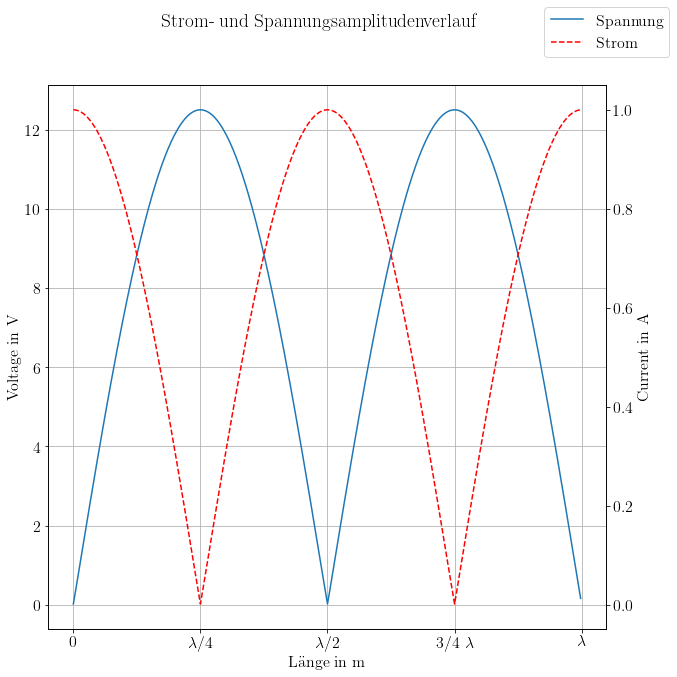

In [61]:
def plot_wire(lamEq,Z_LEq,UlEq,IlEq,LsN,CsN,RsN,GsN,fN,Z_2N,I_2N,**kwargs):
    tN = 0
    for key, value in kwargs.items():
        if key == 'tN':
            tN = value
            break
                
    wN=2*np.pi*fN
    U_2N=I_2N*Z_2N

    lamN = float(lamEq.rhs.subs({Cs:CsN,Ls:LsN,f:fN}))
    display(Latex('$ \\lambda = ' + str(lamN) + ' \\textrm{m}$'))
    
    Z_LEqN = (Z_LEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
    display(Latex('$ Z_L = ( ' + str(re(Z_LEqN.evalf())) + ' + j \cdot '+ str(im(Z_LEqN.evalf())) + ') \ \Omega$'))
    
    ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_L:Z_LEqN}))
    display(Latex('$ r(0) = ' + str(ref0N.evalf()) + ' $'))

    l_array = np.arange(0,lamN,lamN/500) #generate array
    #print(l_array)

    # Voltage
    eq9 = abs(UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
    #display(eq9)
    eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:U_2N,f:fN,t:tN})
    #display(eq10)

    UlN=lambdify(l, (eq10),"numpy") #convert sympy to numpy
    #print(UlN(l_array))

    #Current
    eq11 = abs(IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
    #display(eq11)
    eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:U_2N,f:fN,I_2:I_2N,t:tN})
    #display(eq12)

    IlN=lambdify(l, (eq12),"numpy") #convert sympy to numpy
    #print(UlN(l_array))

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 10)
    fig.suptitle('Strom- und Spannungsamplitudenverlauf')
    ax2 = ax1.twinx()

    p1 = ax1.plot(l_array,UlN(l_array),label='Spannung')
    ax1.set_ylabel('Voltage in V')
    ax1.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
    ax1.grid()
    #ax1.legend('Spannung',loc=7,)
    ax1.invert_xaxis()

    p2 = ax2.plot(l_array,IlN(l_array),'r--',label='Strom')
    ax2.set_ylabel('Current in A')
    #ax2.legend('Strom',)
    ax2.invert_xaxis()
    #ax1.legend([p1,p2],['Spannung','Strom'])
    fig.legend()
    fig.show()
    
plot_wire(lamEq,Z_LEq,UlEq,IlEq,LsN,CsN,RsN,GsN,fN,Z_2N,I_2N)

### Welle im zeitlichen Verlauf
Um die Zeitabhängigkeit zu erhalten müssen die Gleichungen mit $e^{j\cdot \omega \cdot t}$ multipliziert werden.

In [11]:
eq20=Eq(Ult,Ul*exp(j*w*t))
display(eq20)
eq21=Eq(Ilt,Il*exp(j*w*t))
display(eq21)
UltEq = eq20.subs(Ul,UlEq.rhs)
IltEq = eq21.subs(Il,IlEq.rhs)

                                       ⅈ⋅\omega⋅t
\underline{U}(l,t) = \underline{U}(l)⋅ℯ          

                                       ⅈ⋅\omega⋅t
\underline{I}(l,t) = \underline{I}(l)⋅ℯ          

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

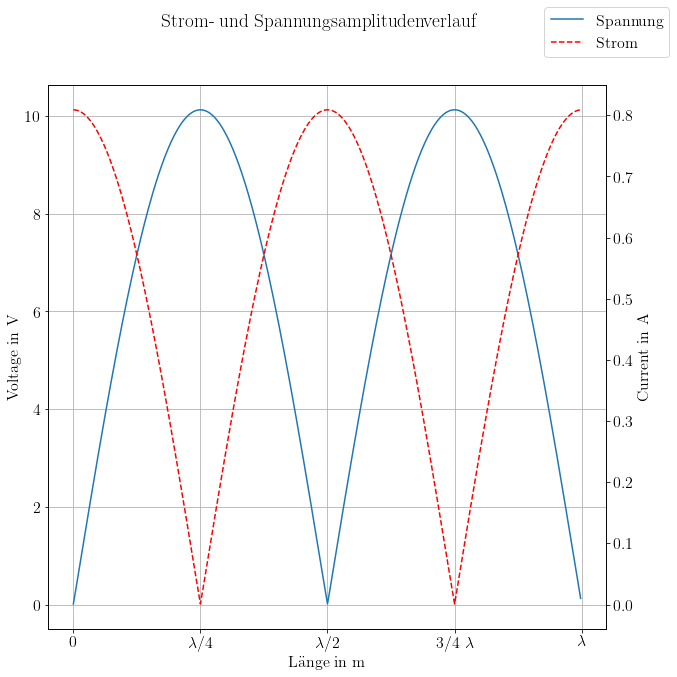

In [37]:
plot_wire(lamEq,Z_LEq,UltEq,IltEq,LsN,CsN,RsN,GsN,fN,Z_2N,I_2N,tN=1/(10*fN))

In [62]:
wN=2*np.pi*fN
U_2N=I_2N*Z_2N



lamN = float(lamEq.rhs.subs({Cs:CsN,Ls:LsN,f:fN}))
display(Latex('$ \\lambda = ' + str(lamN) + ' \\textrm{m}$'))

Z_LEqN = (Z_LEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
display(Latex('$ Z_L = (' + str(re(Z_LEqN.evalf())) + ' + j \cdot '+ str(im(Z_LEqN.evalf())) + ') \ \Omega $'))

ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_L:Z_LEqN}))
display(Latex('$ r(0) = ' + str(ref0N.evalf()) + ' $'))

l_array = np.arange(0,lamN,lamN/500) #generate array
dt = 1/(fN*100)
t_array =np.arange(0,1/fN,dt)
#print(l_array)
#print(t_array)


eq9 = abs(UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
#display(eq9)
eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:U_2N,f:fN,t:0})
#display(eq10)

UlN=lambdify(l, (eq10),"numpy") #convert sympy to numpy

#print(UlN(l_array))

#Current
eq11 = abs(IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
#display(eq11)
eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:U_2N,f:fN,I_2:I_2N,t:0})
#display(eq12)

IlN=lambdify(l, (eq12),"numpy") #convert sympy to numpy
#print(UlN(l_array))


fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

ax1.set(xlim=(0, lamN), ylim=(-max(UlN(l_array)), max(UlN(l_array))),label='Spannung')
ax1.grid()
ax1.invert_xaxis
line1, = ax1.plot([], [], 'b', lw=2)
text = ax1.text(3/4*lamN, 2.05, '')
ax1.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
ax1.set_ylabel('Voltage in V')

ax2.set(xlim=(0, lamN), ylim=(-max(IlN(l_array)), max(IlN(l_array))),label='Strom')
ax2.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
line2, = ax2.plot([], [], 'r--', lw=2)
ax2.invert_xaxis()
ax2.set_ylabel('Strom in A')

#fig.legend()
#fig.show()

time_template = 'time = %.2e $\mu $s'

def init():
#    line, = ax.plot([], [], 'b', lw=2)
    return line1, line2, text

def animate(i):
    tN = t_array[i]
    #print(i)
    #print(tN)
    x = l_array
    
    #display(eq9)
    eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:U_2N,f:fN,t:tN})
    #display(eq10)

    UlN=lambdify(l, (eq10),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
    
    y1 = UlN(l_array)
    
    #Current
    eq11 = abs(IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))*cos(w*t)
    #display(eq11)
    eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:U_2N,f:fN,I_2:I_2N,t:tN})
    #display(eq12)

    IlN=lambdify(l, (eq12),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
    
    y2 = IlN(l_array)
    
       
    
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    text.set_text(time_template % (i*(10**6)*dt))
    return line1, line2, text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(t_array)),interval=50, blit=True, init_func=init)

plt.close()

HTML(anim.to_jshtml())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Welle in Abhängigkeit des Lastwiderstandes

In [64]:
wN=2*np.pi*fN
U_2N=I_2N*Z_2N



lamN = float(lamEq.rhs.subs({Cs:CsN,Ls:LsN,f:fN}))
display(Latex('$ \\lambda = ' + str(lamN) + ' \\textrm{m}$'))

Z_LEqN = (Z_LEq.rhs.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN}))
display(Latex('$ Z_L = (' + str(re(Z_LEqN.evalf())) + ' + j \cdot '+ str(im(Z_LEqN.evalf())) + ') \ \Omega $'))

ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_L:Z_LEqN}))
#display(Latex('$ r(0) = ' + str(ref0N.evalf()) + ' $'))

l_array = np.arange(0,lamN,lamN/500) #generate array
dt = 1/(fN*100)
t_array =np.arange(0,1/fN,dt)
Z_2_data = np.arange(0.01,10*re(Z_LEqN.evalf()),1/10*re(Z_LEqN.evalf()))

Z_2_array = Z_2_data + j*Z_2_data
#print(l_array)
#print(t_array)
#print(Z_2_array)


eq9 = (UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
#display(eq9)
eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:90+90*I,U_2:I_2N*Z_2N,f:fN,t:0})
#display(eq10)

UlN=lambdify(l, abs(eq10),"numpy") #convert sympy to numpy

#print(UlN(l_array))

#Current
eq11 = (IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
#display(eq11)
eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:100+100*I,U_2:I_2N*Z_2N,f:fN,I_2:I_2N,t:0})
#display(eq12)

IlN=lambdify(l, abs(eq12),"numpy") #convert sympy to numpy
#print(UlN(l_array))


fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

#ax1.set(xlim=(0, lamN), ylim=(-max(UlN(l_array)), max(UlN(l_array))))
ax1.set(xlim=(0, lamN), ylim=(0, 200))
ax1.grid()
ax1.invert_xaxis
line1, = ax1.plot([], [], 'b', lw=2)
text = ax1.text(3/4*lamN, 2.05, '')
ax1.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])

ax2.set(xlim=(0, lamN), ylim=(-max(IlN(l_array)), max(IlN(l_array))))
ax2.set(xlabel='Länge in m',xticks=[0,lamN/4,lamN/2,3/4*lamN,lamN],xticklabels=[0,'$\lambda /4 $','$\lambda/2$','$3/4\ \lambda$','$\lambda$'])
line2, = ax2.plot([], [], 'r--', lw=2)
ax2.invert_xaxis()

ax1.set_ylabel('Voltage in V')
ax2.set_ylabel('Strom in A')

text_template = 'r(0) = %.2f'

def init():
#    line, = ax.plot([], [], 'b', lw=2)
    return line1, line2, text

def animate(i):
    tN = 0
    Z_2N = Z_2_array[i]
    U_2N=I_2N*Z_2N
    #print(i)
    #print(Z_2N)
    x = l_array
    
    # Voltage
    eq9 = (UlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
    #display(eq9)
    eq10 = eq9.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:I_2N*Z_2N,f:fN,t:tN})
    #display(eq10)

    UlN=lambdify(l, abs(eq10),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
    
    y1 = UlN(l_array)

    #Current
    eq11 = (IlEq.rhs.subs({lam:lamEq.rhs,Z_L:Z_LEq.rhs}))
    #display(eq11)
    eq12 = eq11.subs({Cs:CsN,Ls:LsN,Rs:RsN,Gs:GsN,w:wN,Z_2:Z_2N,U_2:I_2N*Z_2N,f:fN,I_2:I_2N,t:tN})
    #display(eq12)

    IlN=lambdify(l, abs(eq12),"numpy") #convert sympy to numpy
    #print(UlN(l_array))
        
    y2 = IlN(l_array)
    
    ref0N = abs(ref0Eq.rhs.subs({Z_2:Z_2N,Z_L:Z_LEqN})).evalf()
    
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    text.set_text(text_template % (ref0N))
    return line1, line2, text

anim = animation.FuncAnimation(fig, animate, np.arange(0, len(Z_2_array)),interval=25, blit=True, init_func=init)

plt.close()

HTML(anim.to_jshtml())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>